In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [13]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/classes/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 2998 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [14]:
test_dataset.class_indices

{'class1': 0, 'class2': 1}

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit_generator(train_dataset,
         steps_per_epoch = 8,
         epochs = 10
#         validation_data = test_dataset
         )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
8/8 [==============================] - 2s 131ms/step - loss: 0.4575 - accuracy: 0.7886
Epoch 2/10
8/8 [==============================] - 1s 136ms/step - loss: 0.4059 - accuracy: 0.8740
Epoch 3/10
8/8 [==============================] - 1s 134ms/step - loss: 0.3106 - accuracy: 0.9024
Epoch 4/10
8/8 [==============================] - 1s 139ms/step - loss: 0.3080 - accuracy: 0.8984
Epoch 5/10
8/8 [==============================] - 1s 139ms/step - loss: 0.2431 - accuracy: 0.9102
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.2591 - accuracy: 0.8984
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.2702 - accuracy: 0.8828
Epoch 8/10
8/8 [==============================] - 1s 142ms/step - loss: 0.1568 - accuracy: 0.9297
Epoch 9/10
8/8 [==============================] - 1s 139ms/step - loss: 0.1238 - accuracy: 0.9414
Epoch 10/10
8/8 [==============================] - 1s 141ms/step - loss: 0.1223 - accuracy: 0.9375


In [18]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Vulnerable",fontsize=30)
        
    elif val == 0:
        
        plt.xlabel("Non-Vulnerable",fontsize=30)

[[0.]]


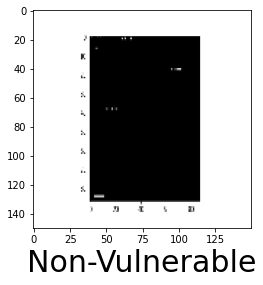

In [19]:
predictImage("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/dump csv/Copy of yaml_3096.png")

[[0.]]


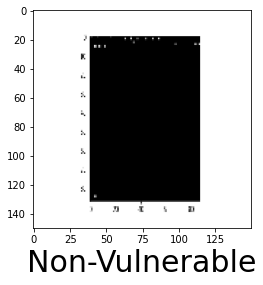

In [20]:
predictImage("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/test/class1/yaml_3010.png")

[[1.]]


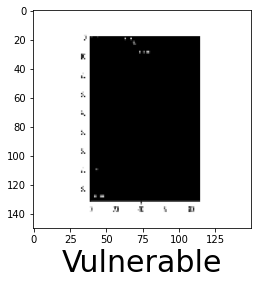

In [21]:
predictImage("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/test/class2/yaml_3217.png")

[[0.]]


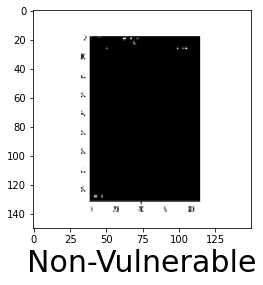

In [22]:
predictImage("/content/drive/My Drive/MAJOR PROJECT /Phase-4/aravindcsv/test/class1/yaml_3006.png")